In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
%matplotlib inline


In [2]:
airbnb = pd.read_csv("desktop/mltextfile/dataset/airbnbfyp1.csv")
airbnb

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,city
0,09/09/2008,f,t,t,Midtown,Entire home/apt,2,1.0,NaN,$175.00,07/10/2020,48,94.0,9.0,9.0,10.0,10.0,10.0,New York
1,07/12/2008,f,t,t,Clinton Hill,Entire home/apt,3,1.0,1.0,$76.00,09/10/2020,354,89.0,8.0,9.0,9.0,9.0,9.0,New York
2,03/02/2009,f,t,t,Bedford-Stuyvesant,Private room,2,1.0,1.0,$60.00,09/10/2020,50,90.0,8.0,8.0,10.0,10.0,9.0,New York
3,03/02/2009,f,t,f,Sunset Park,Entire home/apt,4,1.5,2.0,$175.00,08/10/2020,1,97.0,10.0,10.0,10.0,10.0,8.0,New York
4,03/03/2009,f,t,f,Hell's Kitchen,Private room,2,1.0,1.0,$73.00,07/10/2020,473,84.0,9.0,7.0,9.0,9.0,10.0,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69762,21/09/2012,f,t,t,28801,Entire home/apt,3,1.0,1.0,$81.29,24/10/2020,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville
69763,22/01/2018,f,t,f,28715,Private room,2,1.0,1.0,$61.00,24/10/2020,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville
69764,12/11/2014,f,t,t,28803,Private room,2,1.0,1.0,$88.00,24/10/2020,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville
69765,10/03/2015,f,t,t,28805,Private room,4,1.5,1.0,$60.00,24/10/2020,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville


# Data Analysis  

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69767 entries, 0 to 69766
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   69747 non-null  object 
 1   host_is_superhost            69747 non-null  object 
 2   host_has_profile_pic         69747 non-null  object 
 3   host_identity_verified       69747 non-null  object 
 4   neighbourhood_cleansed       69767 non-null  object 
 5   room_type                    69767 non-null  object 
 6   accommodates                 69767 non-null  int64  
 7   bathrooms                    69766 non-null  float64
 8   bedrooms                     63921 non-null  float64
 9   price                        69767 non-null  object 
 10  calendar_last_scraped        69767 non-null  object 
 11  number_of_reviews            69767 non-null  int64  
 12  review_scores_rating         53241 non-null  float64
 13  review_scores_ac

In [4]:
#convert mix datatype in neighbourhood_cleansed to string datatype

airbnb['neighbourhood_cleansed'] = airbnb.neighbourhood_cleansed.astype(str)
airbnb['neighbourhood_cleansed']

0                   Midtown
1              Clinton Hill
2        Bedford-Stuyvesant
3               Sunset Park
4            Hell's Kitchen
                ...        
69762                 28801
69763                 28715
69764                 28803
69765                 28805
69766                 28805
Name: neighbourhood_cleansed, Length: 69767, dtype: object

In [5]:
#convert price datatype from object to float

airbnb['price'] = airbnb.price.str.replace('$','')
airbnb['price'] = airbnb.price.str.replace(',','').astype(float)
airbnb['price']

0        175.00
1         76.00
2         60.00
3        175.00
4         73.00
          ...  
69762     81.29
69763     61.00
69764     88.00
69765     60.00
69766     60.00
Name: price, Length: 69767, dtype: float64

In [6]:
#convert date datatype in host_since from object to datetime

airbnb["host_since"] = pd.to_datetime(airbnb["host_since"])
airbnb["host_since"]

0       2008-09-09
1       2008-07-12
2       2009-03-02
3       2009-03-02
4       2009-03-03
           ...    
69762   2012-09-21
69763   2018-01-22
69764   2014-12-11
69765   2015-10-03
69766   2015-10-03
Name: host_since, Length: 69767, dtype: datetime64[ns]

In [7]:
#convert date datatype in calendar_last_scraped from object to datetime

airbnb["calendar_last_scraped"] = pd.to_datetime(airbnb["calendar_last_scraped"])
airbnb["calendar_last_scraped"]

0       2020-07-10
1       2020-09-10
2       2020-09-10
3       2020-08-10
4       2020-07-10
           ...    
69762   2020-10-24
69763   2020-10-24
69764   2020-10-24
69765   2020-10-24
69766   2020-10-24
Name: calendar_last_scraped, Length: 69767, dtype: datetime64[ns]

In [8]:
#creating a new column of the hosts'year of experience

airbnb['year_of_experience'] = airbnb['calendar_last_scraped'].dt.to_period('Y').astype(int) - airbnb['host_since'].dt.to_period('Y').astype(int)
airbnb['year_of_experience']

0        12
1        12
2        11
3        11
4        11
         ..
69762     8
69763     2
69764     6
69765     5
69766     5
Name: year_of_experience, Length: 69767, dtype: int64

In [9]:
airbnb.drop(['host_since','calendar_last_scraped'], axis=1, inplace=True)
airbnb

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,city,year_of_experience
0,f,t,t,Midtown,Entire home/apt,2,1.0,NaN,175.00,48,94.0,9.0,9.0,10.0,10.0,10.0,New York,12
1,f,t,t,Clinton Hill,Entire home/apt,3,1.0,1.0,76.00,354,89.0,8.0,9.0,9.0,9.0,9.0,New York,12
2,f,t,t,Bedford-Stuyvesant,Private room,2,1.0,1.0,60.00,50,90.0,8.0,8.0,10.0,10.0,9.0,New York,11
3,f,t,f,Sunset Park,Entire home/apt,4,1.5,2.0,175.00,1,97.0,10.0,10.0,10.0,10.0,8.0,New York,11
4,f,t,f,Hell's Kitchen,Private room,2,1.0,1.0,73.00,473,84.0,9.0,7.0,9.0,9.0,10.0,New York,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69762,f,t,t,28801,Entire home/apt,3,1.0,1.0,81.29,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville,8
69763,f,t,f,28715,Private room,2,1.0,1.0,61.00,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville,2
69764,f,t,t,28803,Private room,2,1.0,1.0,88.00,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville,6
69765,f,t,t,28805,Private room,4,1.5,1.0,60.00,0,NaN,NaN,NaN,NaN,NaN,NaN,Ashville,5


In [10]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69767 entries, 0 to 69766
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            69747 non-null  object 
 1   host_has_profile_pic         69747 non-null  object 
 2   host_identity_verified       69747 non-null  object 
 3   neighbourhood_cleansed       69767 non-null  object 
 4   room_type                    69767 non-null  object 
 5   accommodates                 69767 non-null  int64  
 6   bathrooms                    69766 non-null  float64
 7   bedrooms                     63921 non-null  float64
 8   price                        69767 non-null  float64
 9   number_of_reviews            69767 non-null  int64  
 10  review_scores_rating         53241 non-null  float64
 11  review_scores_accuracy       53087 non-null  float64
 12  review_scores_cleanliness    53101 non-null  float64
 13  review_scores_ch

In [11]:
#Handling null value 

airbnb = airbnb.replace(0,np.NaN)

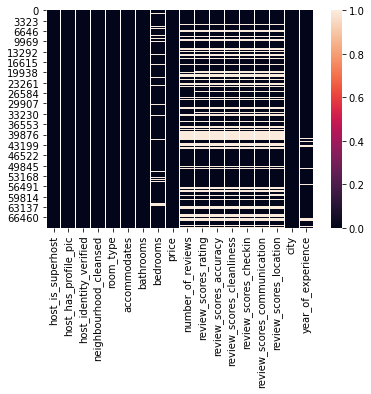

In [12]:
sns.heatmap(airbnb.isnull())

In [13]:
airbnb.isnull().sum()

host_is_superhost                 20
host_has_profile_pic              20
host_identity_verified            20
neighbourhood_cleansed             0
room_type                          0
accommodates                       9
bathrooms                        420
bedrooms                        5846
price                             29
number_of_reviews              15302
review_scores_rating           16526
review_scores_accuracy         16680
review_scores_cleanliness      16666
review_scores_checkin          16696
review_scores_communication    16677
review_scores_location         16706
city                               0
year_of_experience              2936
dtype: int64

In [14]:
#drop null value 

airbnb.dropna(how='any', inplace=True)

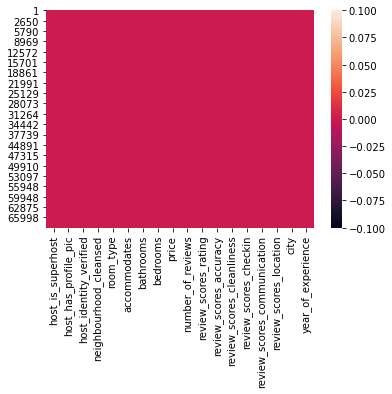

In [15]:
sns.heatmap(airbnb.isnull())

In [16]:
#convert datatype from float to int


airbnb['bedrooms'] = airbnb.bedrooms.astype(int)
airbnb['bathrooms'] = airbnb.bathrooms.astype(int)
airbnb['accommodates'] = airbnb.accommodates.astype(int)
airbnb['year_of_experience'] = airbnb.year_of_experience.astype(int)
airbnb['number_of_reviews'] = airbnb.number_of_reviews.astype(int)
airbnb['review_scores_rating'] = airbnb.review_scores_rating.astype(int)
airbnb['review_scores_accuracy'] = airbnb.review_scores_accuracy.astype(int)
airbnb['review_scores_cleanliness'] = airbnb.review_scores_cleanliness.astype(int)
airbnb['review_scores_checkin'] = airbnb.review_scores_checkin.astype(int)
airbnb['review_scores_communication'] = airbnb.review_scores_communication.astype(int)
airbnb['review_scores_location'] = airbnb.review_scores_communication.astype(int)


#convert datatype from float to int

airbnb['price'] = airbnb.price.astype(int)
airbnb['bedrooms'] = airbnb.bedrooms.astype(np.uint8)
airbnb['bathrooms'] = airbnb.bathrooms.astype(np.uint8)
airbnb['accommodates'] = airbnb.accommodates.astype(np.uint8)
airbnb['year_of_experience'] = airbnb.year_of_experience.astype(np.uint8)
airbnb['number_of_reviews'] = airbnb.number_of_reviews.astype(np.uint8)
airbnb['review_scores_rating'] = airbnb.review_scores_rating.astype(np.uint8)
airbnb['review_scores_accuracy'] = airbnb.review_scores_accuracy.astype(np.uint8)
airbnb['review_scores_cleanliness'] = airbnb.review_scores_cleanliness.astype(np.uint8)
airbnb['review_scores_checkin'] = airbnb.review_scores_checkin.astype(np.uint8)
airbnb['review_scores_communication'] = airbnb.review_scores_communication.astype(np.uint8)
airbnb['review_scores_location'] = airbnb.review_scores_communication.astype(np.uint8)

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47538 entries, 1 to 69755
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            47538 non-null  object 
 1   host_has_profile_pic         47538 non-null  object 
 2   host_identity_verified       47538 non-null  object 
 3   neighbourhood_cleansed       47538 non-null  object 
 4   room_type                    47538 non-null  object 
 5   accommodates                 47538 non-null  int32  
 6   bathrooms                    47538 non-null  int32  
 7   bedrooms                     47538 non-null  int32  
 8   price                        47538 non-null  float64
 9   number_of_reviews            47538 non-null  int32  
 10  review_scores_rating         47538 non-null  int32  
 11  review_scores_accuracy       47538 non-null  int32  
 12  review_scores_cleanliness    47538 non-null  int32  
 13  review_scores_ch

Text(0.5, 1.0, 'Histogram of intial price distribution')

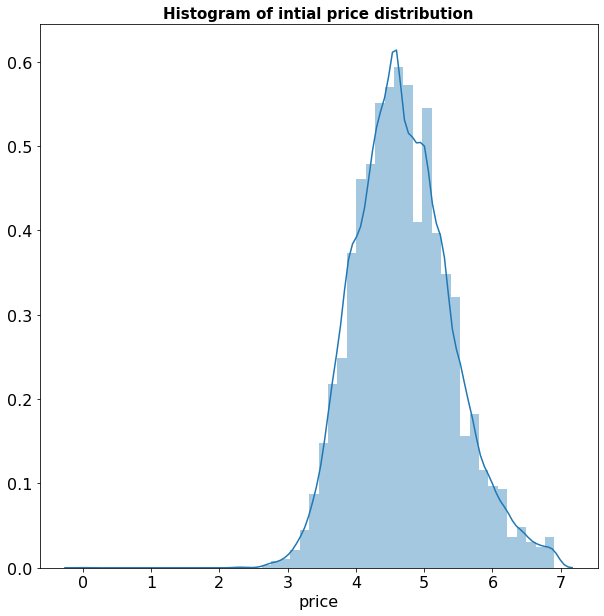

In [105]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Checking on price distribution 

plt.figure(figsize=(10,10))
sns.distplot(airbnb['price'],bins=50)
plt.title("Histogram of intial price D",size=15, weight='bold')

In [19]:
#Filtering price to <=1000 to reduce outliers and get normal distribution

airbnb = airbnb[airbnb.price <= 1000]
airbnb

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,city,year_of_experience
1,f,t,t,Clinton Hill,Entire home/apt,3,1,1,76.0,354,89,8,9,9,9,9,New York,12
2,f,t,t,Bedford-Stuyvesant,Private room,2,1,1,60.0,50,90,8,8,10,10,10,New York,11
3,f,t,f,Sunset Park,Entire home/apt,4,1,2,175.0,1,97,10,10,10,10,10,New York,11
4,f,t,f,Hell's Kitchen,Private room,2,1,1,73.0,473,84,9,7,9,9,9,New York,11
5,f,t,t,Upper West Side,Private room,1,1,1,75.0,118,98,10,10,10,10,10,New York,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69746,t,t,t,28806,Entire home/apt,6,1,2,113.0,2,100,10,10,10,10,10,Ashville,4
69749,f,t,f,28806,Entire home/apt,5,2,3,155.0,3,100,10,10,10,10,10,Ashville,4
69751,f,t,f,28801,Entire home/apt,2,1,1,195.0,1,100,10,10,10,10,10,Ashville,3
69753,f,t,f,28803,Entire home/apt,6,2,3,129.0,1,100,10,10,10,10,10,Ashville,2


## Price Distribution for Host-Controlled Variables  

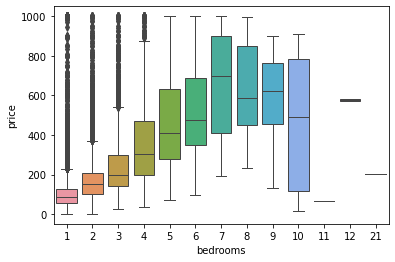

In [20]:
#Price distribution for bedrooms 

bedrooms = sns.boxplot(x= airbnb['bedrooms'], y= airbnb['price'],linewidth=1)
bedrooms

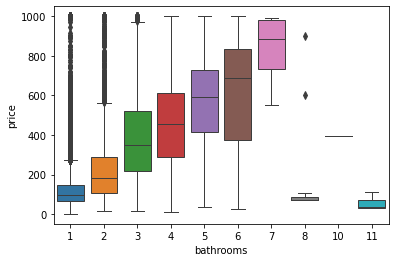

In [21]:
#Price distribution for bathrooms  

bathrooms = sns.boxplot(x= airbnb['bathrooms'], y= airbnb['price'],linewidth=1)
bathrooms

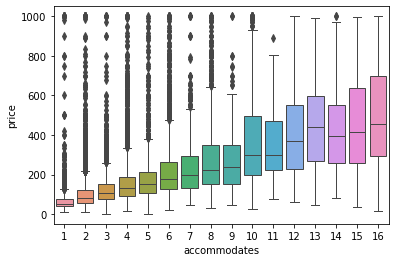

In [22]:
#Price distribution for accomodates 

accommodates = sns.boxplot(x= airbnb['accommodates'], y= airbnb['price'],linewidth=1)
accommodates

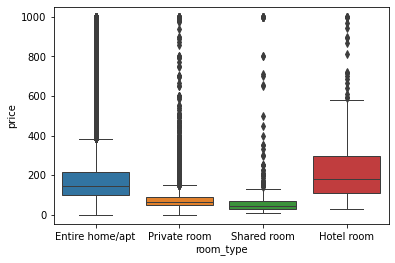

In [23]:
#Price distribution for room type 

room_type = sns.boxplot(x= airbnb['room_type'], y= airbnb['price'],linewidth=1)
room_type

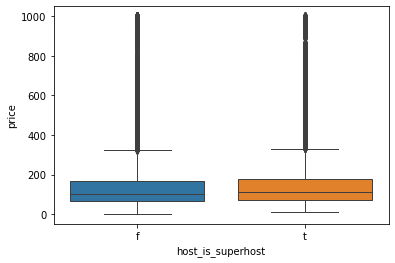

In [24]:
#Price distribution for host is superhost

superhost = sns.boxplot(x=airbnb['host_is_superhost'], y= airbnb['price'], linewidth=1)
superhost

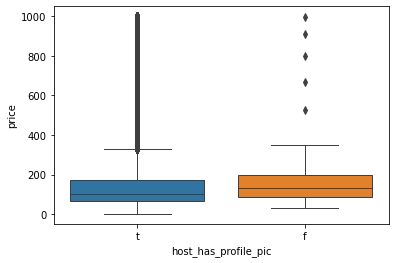

In [25]:
#Price distribution for host has profile picture 

profile_picture = sns.boxplot(x=airbnb['host_has_profile_pic'], y= airbnb['price'],linewidth=1)
profile_picture

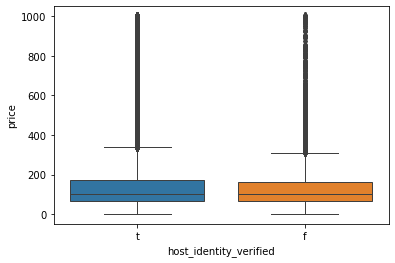

In [26]:
#Price distribution for host identity verified 

identity = sns.boxplot(x= airbnb['host_identity_verified'], y= airbnb['price'],linewidth=1)
identity

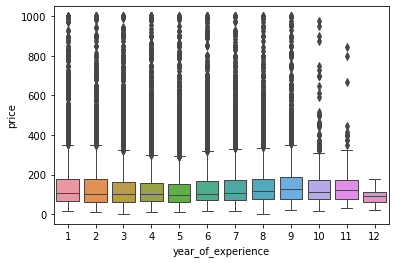

In [27]:
#Price distribution for hosts' year of experience 

experience = sns.boxplot(x= airbnb['year_of_experience'], y= airbnb['price'],linewidth=1)
experience

## Price Distribution for Out of Host-Controlled Variables 

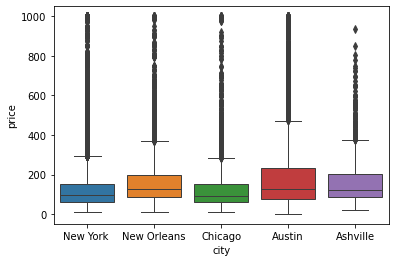

In [28]:
#Price distribution for cities

city = sns.boxplot(x= airbnb['city'], y= airbnb['price'],linewidth=1)
city

# Data Preprocessing 

Text(0.5, 1.0, 'Price Distribution Plot')

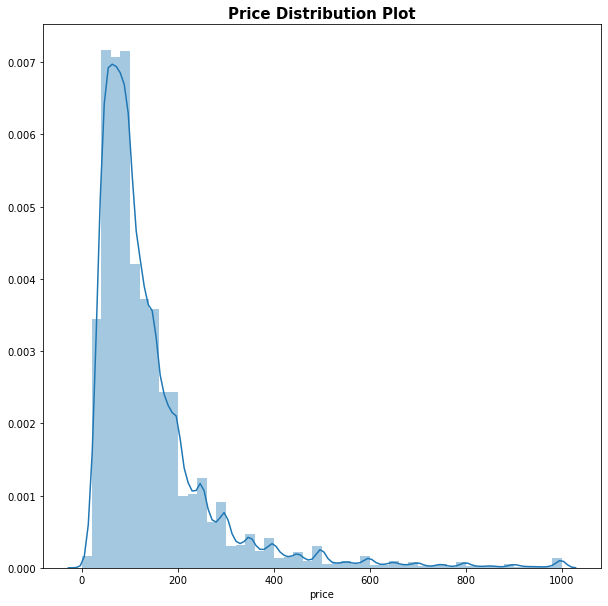

In [29]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Checking on price distribution 

plt.figure(figsize=(10,10))
sns.distplot(airbnb['price'],bins=50)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [30]:
#np.log is used to create a normal price distribution

airbnb['price'] = np.log(airbnb.price)

Text(0.5, 1.0, 'Log Price Distribution Plot')

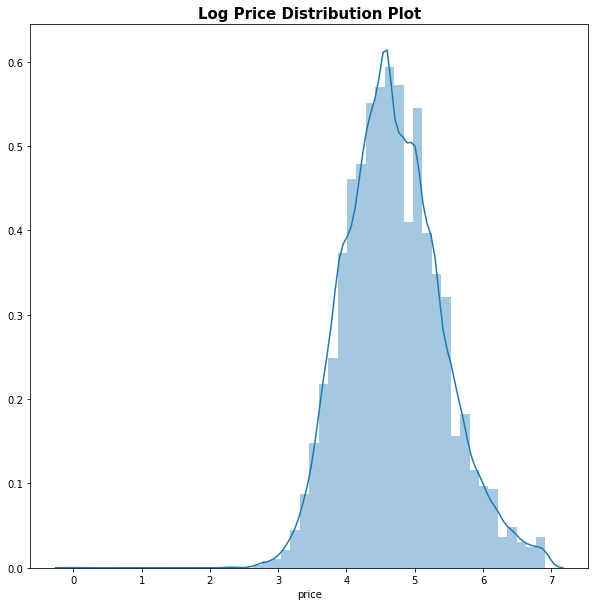

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(airbnb['price'],bins=50)
plt.title("Log Price Distribution Plot",size=15, weight='bold')

In [32]:
airbnb.describe()

,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,year_of_experience
count,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000,47184.000000
mean,3.520515,1.231222,1.513034,4.693658,39.775220,94.740315,9.673258,9.412894,9.786729,9.779374,9.779374,4.992349
std,2.448123,0.557777,0.910626,0.704665,62.812347,8.252571,0.810037,1.010720,0.695523,0.715239,0.715239,2.390054
min,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,2.000000,1.000000,1.000000,4.189655,4.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,3.000000
50%,3.000000,1.000000,1.000000,4.615121,14.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000
75%,4.000000,1.000000,2.000000,5.141664,49.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000
max,16.000000,11.000000,21.000000,6.907755,976.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.000000


## Handling Categorical Value for Host-Controlled Variables

In [33]:
#extracting 'room_type' from categorical to numerical values

room_type = pd.get_dummies(airbnb["room_type"], prefix='room_type')
room_type 

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
69746,1,0,0,0
69749,1,0,0,0
69751,1,0,0,0
69753,1,0,0,0


In [34]:
#concatenate extracted 'room_type' features into initial data frame

airbnb = pd.concat([airbnb,room_type], axis=1)
airbnb.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
1,f,t,t,Clinton Hill,Entire home/apt,3,1,1,4.330733,354,...,9,9,9,9,New York,12,1,0,0,0
2,f,t,t,Bedford-Stuyvesant,Private room,2,1,1,4.094345,50,...,8,10,10,10,New York,11,0,0,1,0
3,f,t,f,Sunset Park,Entire home/apt,4,1,2,5.164786,1,...,10,10,10,10,New York,11,1,0,0,0
4,f,t,f,Hell's Kitchen,Private room,2,1,1,4.290459,473,...,7,9,9,9,New York,11,0,0,1,0
5,f,t,t,Upper West Side,Private room,1,1,1,4.317488,118,...,10,10,10,10,New York,11,0,0,1,0


In [35]:
#extracting 'host_is_superhost' from categorical to numerical values

host_is_superhost = pd.get_dummies(airbnb["host_is_superhost"], prefix='host_is_superhost', drop_first=True)
host_is_superhost 

,host_is_superhost_t
1,0
2,0
3,0
4,0
5,0
...,...
69746,1
69749,0
69751,0
69753,0


In [36]:
#concatenate extracted 'host_is_superhost ' features into initial data frame

airbnb = pd.concat([airbnb,host_is_superhost], axis=1)
airbnb.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,...,review_scores_checkin,review_scores_communication,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t
1,f,t,t,Clinton Hill,Entire home/apt,3,1,1,4.330733,354,...,9,9,9,New York,12,1,0,0,0,0
2,f,t,t,Bedford-Stuyvesant,Private room,2,1,1,4.094345,50,...,10,10,10,New York,11,0,0,1,0,0
3,f,t,f,Sunset Park,Entire home/apt,4,1,2,5.164786,1,...,10,10,10,New York,11,1,0,0,0,0
4,f,t,f,Hell's Kitchen,Private room,2,1,1,4.290459,473,...,9,9,9,New York,11,0,0,1,0,0
5,f,t,t,Upper West Side,Private room,1,1,1,4.317488,118,...,10,10,10,New York,11,0,0,1,0,0


In [37]:
#extracting 'host_has_profile_pic' from categorical to numerical values

host_has_profile_pic = pd.get_dummies(airbnb["host_has_profile_pic"], prefix='host_has_profile_pic', drop_first=True)
host_has_profile_pic 

,host_has_profile_pic_t
1,1
2,1
3,1
4,1
5,1
...,...
69746,1
69749,1
69751,1
69753,1


In [38]:
#concatenate extracted 'host_has_profile_pic ' features into initial data frame

airbnb = pd.concat([airbnb,host_has_profile_pic], axis=1)
airbnb.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,...,review_scores_communication,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t
1,f,t,t,Clinton Hill,Entire home/apt,3,1,1,4.330733,354,...,9,9,New York,12,1,0,0,0,0,1
2,f,t,t,Bedford-Stuyvesant,Private room,2,1,1,4.094345,50,...,10,10,New York,11,0,0,1,0,0,1
3,f,t,f,Sunset Park,Entire home/apt,4,1,2,5.164786,1,...,10,10,New York,11,1,0,0,0,0,1
4,f,t,f,Hell's Kitchen,Private room,2,1,1,4.290459,473,...,9,9,New York,11,0,0,1,0,0,1
5,f,t,t,Upper West Side,Private room,1,1,1,4.317488,118,...,10,10,New York,11,0,0,1,0,0,1


In [39]:
#extracting 'host_identity_verified' from categorical to numerical values

host_identity_verified = pd.get_dummies(airbnb["host_identity_verified"], prefix='host_identity_verified', drop_first=True)
host_identity_verified 

,host_identity_verified_t
1,1
2,1
3,0
4,0
5,1
...,...
69746,1
69749,0
69751,0
69753,0


In [40]:
#concatenate extracted 'host_identity_verified ' features into initial data frame

airbnb = pd.concat([airbnb,host_identity_verified], axis=1)
airbnb.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,...,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t
1,f,t,t,Clinton Hill,Entire home/apt,3,1,1,4.330733,354,...,9,New York,12,1,0,0,0,0,1,1
2,f,t,t,Bedford-Stuyvesant,Private room,2,1,1,4.094345,50,...,10,New York,11,0,0,1,0,0,1,1
3,f,t,f,Sunset Park,Entire home/apt,4,1,2,5.164786,1,...,10,New York,11,1,0,0,0,0,1,0
4,f,t,f,Hell's Kitchen,Private room,2,1,1,4.290459,473,...,9,New York,11,0,0,1,0,0,1,0
5,f,t,t,Upper West Side,Private room,1,1,1,4.317488,118,...,10,New York,11,0,0,1,0,0,1,1


In [41]:
#dropping categorical values features

airbnb.drop(['host_identity_verified','host_has_profile_pic','host_is_superhost','room_type'],
              axis=1, inplace=True)
airbnb.head() 

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,9,New York,12,1,0,0,0,0,1,1
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,10,New York,11,0,0,1,0,0,1,1
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,10,New York,11,1,0,0,0,0,1,0
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,9,New York,11,0,0,1,0,0,1,0
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,10,New York,11,0,0,1,0,0,1,1


In [42]:
airbnb.corr()

,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t
accommodates,1.000000,0.567001,0.827142,0.586974,0.052486,0.036970,0.022324,0.072586,0.035623,0.011118,0.011118,-0.077403,0.507640,-0.022920,-0.484984,-0.090576,0.124070,-0.004861,0.005883
bathrooms,0.567001,1.000000,0.638451,0.378530,-0.029399,0.024781,0.012185,0.038020,0.016651,-0.016308,-0.016308,-0.055127,0.184402,0.002162,-0.186757,-0.000600,0.067041,0.003500,0.015361
bedrooms,0.827142,0.638451,1.000000,0.541066,0.005737,0.054318,0.034635,0.077212,0.045063,0.022345,0.022345,-0.054881,0.412084,-0.036125,-0.390168,-0.075018,0.111905,0.004608,-0.006455
price,0.586974,0.378530,0.541066,1.000000,-0.044929,0.081836,0.038816,0.114788,0.029810,0.026230,0.026230,0.044384,0.579459,0.065288,-0.556053,-0.154694,0.055115,-0.014072,0.009948
number_of_reviews,0.052486,-0.029399,0.005737,-0.044929,1.000000,0.071652,0.100699,0.116446,0.098515,0.084817,0.084817,0.136670,0.058274,-0.002968,-0.049265,-0.033921,0.313665,0.008079,0.037104
review_scores_rating,0.036970,0.024781,0.054318,0.081836,0.071652,1.000000,0.767325,0.733313,0.633922,0.687900,0.687900,0.080586,0.100635,-0.057413,-0.079811,-0.043567,0.238737,0.018285,0.011337
review_scores_accuracy,0.022324,0.012185,0.034635,0.038816,0.100699,0.767325,1.000000,0.628573,0.609942,0.637487,0.637487,0.088902,0.090310,-0.058439,-0.068074,-0.047678,0.217533,0.024609,0.009659
review_scores_cleanliness,0.072586,0.038020,0.077212,0.114788,0.116446,0.733313,0.628573,1.000000,0.473549,0.498967,0.498967,0.023856,0.123371,-0.012759,-0.109965,-0.046543,0.269923,0.022259,0.010247
review_scores_checkin,0.035623,0.016651,0.045063,0.029810,0.098515,0.633922,0.609942,0.473549,1.000000,0.694739,0.694739,0.081062,0.071379,-0.041712,-0.052158,-0.046742,0.172951,0.021942,0.006632
review_scores_communication,0.011118,-0.016308,0.022345,0.026230,0.084817,0.687900,0.637487,0.498967,0.694739,1.000000,1.000000,0.099189,0.070874,-0.052698,-0.051567,-0.039781,0.178642,0.035068,0.013765


In [107]:
airbnb.shape

(47184, 21)

# Host-Controlled Variables Model

In [43]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47184 entries, 1 to 69755
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       47184 non-null  object 
 1   accommodates                 47184 non-null  int32  
 2   bathrooms                    47184 non-null  int32  
 3   bedrooms                     47184 non-null  int32  
 4   price                        47184 non-null  float64
 5   number_of_reviews            47184 non-null  int32  
 6   review_scores_rating         47184 non-null  int32  
 7   review_scores_accuracy       47184 non-null  int32  
 8   review_scores_cleanliness    47184 non-null  int32  
 9   review_scores_checkin        47184 non-null  int32  
 10  review_scores_communication  47184 non-null  int32  
 11  review_scores_location       47184 non-null  int32  
 12  city                         47184 non-null  object 
 13  year_of_experien

# Limited use of host-controlled variables model

In [44]:
#Separating dataset into host-controlled features

LX_HC = airbnb.iloc[:,[1,2,3,14,15,16,17,18]].values #Independent features 
Ly_HC = airbnb.iloc[:,4].values #Dependent feature

print(LX_HC.shape)
print(Ly_HC.shape)

(47184, 8)
(47184,)


In [45]:
from sklearn.model_selection import train_test_split

LX_HC_train,LX_HC_test,Ly_HC_train,Ly_HC_test = train_test_split(LX_HC,Ly_HC,test_size=0.2,random_state=5)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #use to calculate model accuracy

L_model = LinearRegression()
L_model.fit(LX_HC_train,Ly_HC_train)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Host-Controlled Variables :")
print("Training Set  : {:.5f}".format(L_model.score(LX_HC_train,Ly_HC_train)))
print("Testing Set  : {:.5f}".format(L_model.score(LX_HC_test,Ly_HC_test)))

Ly_train_pred = L_model.predict(LX_HC_train)
Ly_test_pred = L_model.predict(LX_HC_test)
print("Train R2 score :", r2_score(Ly_HC_train,Ly_train_pred))
print("Test R2 score :", r2_score(Ly_HC_test,Ly_test_pred))
print("Train mse: ",mean_squared_error(Ly_HC_train, Ly_train_pred))
print("Test mse: ", mean_squared_error(Ly_HC_test, Ly_test_pred))
print("Train rmse: ", sqrt(mean_squared_error(Ly_HC_train, Ly_train_pred)))
print("Test rmse: ", sqrt(mean_squared_error(Ly_HC_test, Ly_test_pred)))

Host-Controlled Variables :
Training Set  : 0.48446
Testing Set  : 0.48987
Train R2 score : 0.4844585529147647
Test R2 score : 0.4898709656216268
Train mse:  0.2563337861186961
Test mse:  0.2519325407520927
Train rmse:  0.5062941695483922
Test rmse:  0.501928820403942


In [48]:
import statsmodels.api as sm

L_model1tr = sm.OLS(Ly_HC_train,LX_HC_train).fit()

In [49]:
print_modeltr = L_model1tr.summary()
print(print_modeltr)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     5066.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:57:03   Log-Likelihood:                -27868.
No. Observations:               37747   AIC:                         5.575e+04
Df Residuals:                   37739   BIC:                         5.582e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0617      0.002     30.586      0.0

In [50]:
import statsmodels.api as sm

L_model1te = sm.OLS(Ly_HC_test,LX_HC_test).fit()

In [51]:
print_modelte = L_model1te.summary()
print(print_modelte)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1299.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:57:03   Log-Likelihood:                -6876.1
No. Observations:                9437   AIC:                         1.377e+04
Df Residuals:                    9429   BIC:                         1.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0607      0.004     14.849      0.0

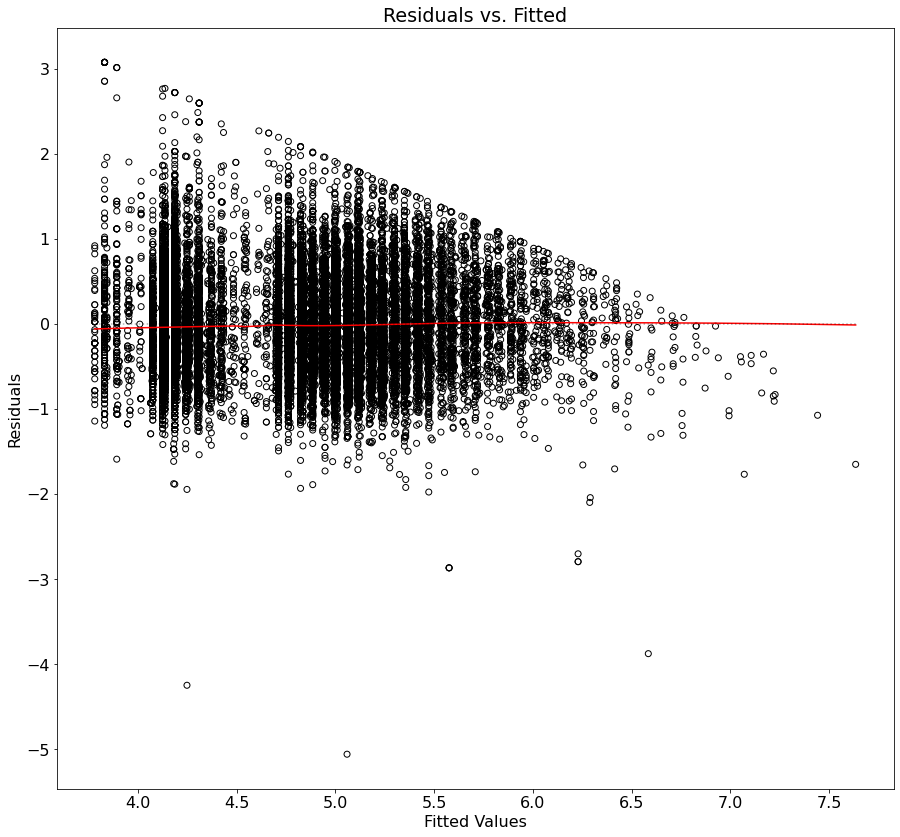

In [52]:
residuals2 = L_model1tr.resid
fitted2 = L_model1tr.fittedvalues
smoothed2 = lowess(residuals2,fitted2)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (15,14)
fig, ax = plt.subplots()
ax.scatter(fitted2, residuals2, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed2[:,0],smoothed2[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted2),max(fitted2)],[0,0],color = 'k',linestyle = ':', alpha = .3)


plt.show()

#-----------------------------------------------------------------------------------------------------------------------------

# Additional factors to host-controlled variables model

In [53]:
# Separating dataset into host-controlled features

AX_HC = airbnb.iloc[:,[1,2,3,13,14,15,16,17,18,19,20]].values #Independent features 
Ay_HC = airbnb.iloc[:,4].values #Dependent feature

print(AX_HC.shape)
print(Ay_HC.shape)

(47184, 11)
(47184,)


In [54]:
from sklearn.model_selection import train_test_split

AX_HC_train,AX_HC_test,Ay_HC_train,Ay_HC_test = train_test_split(AX_HC,Ay_HC,test_size=0.2,random_state=5)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #use to calculate model accuracy

A_model = LinearRegression()
A_model.fit(AX_HC_train,Ay_HC_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Host-Controlled Variables :")
print("Training Set  : {:.5f}".format(A_model.score(AX_HC_train,Ay_HC_train)))
print("Testing Set  : {:.5f}".format(A_model.score(AX_HC_test,Ay_HC_test)))

Ay_train_pred = A_model.predict(AX_HC_train)
Ay_test_pred = A_model.predict(AX_HC_test)
print("Train R2 score : ", r2_score(Ay_HC_train,Ay_train_pred))
print("Test R2 score :", r2_score(Ay_HC_test,Ay_test_pred))
print("Train mse: ",mean_squared_error(Ay_HC_train, Ay_train_pred))
print("Test mse: ", mean_squared_error(Ay_HC_test, Ay_test_pred))
print("Train rmse: ", sqrt(mean_squared_error(Ay_HC_train, Ay_train_pred)))
print("Test rmse: ", sqrt(mean_squared_error(Ay_HC_test, Ay_test_pred)))

Host-Controlled Variables :
Training Set  : 0.48780
Testing Set  : 0.49299
Train R2 score :  0.48779686295014046
Test R2 score : 0.4929907100373828
Train mse:  0.25467393577020525
Test mse:  0.2503918224549734
Train rmse:  0.5046522919498189
Test rmse:  0.5003916690503284


In [57]:
import statsmodels.api as sm

A_model1tr = sm.OLS(Ay_HC_train,AX_HC_train).fit()

In [58]:
print_modeltr = A_model1tr.summary()
print(print_modeltr)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3594.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:57:12   Log-Likelihood:                -27745.
No. Observations:               37747   AIC:                         5.551e+04
Df Residuals:                   37736   BIC:                         5.561e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0644      0.002     31.884      0.0

In [59]:
import statsmodels.api as sm

A_model1te = sm.OLS(Ay_HC_train,AX_HC_train).fit()

In [60]:
print_model = A_model1te.summary()
print(print_modelte)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1299.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:57:03   Log-Likelihood:                -6876.1
No. Observations:                9437   AIC:                         1.377e+04
Df Residuals:                    9429   BIC:                         1.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0607      0.004     14.849      0.0

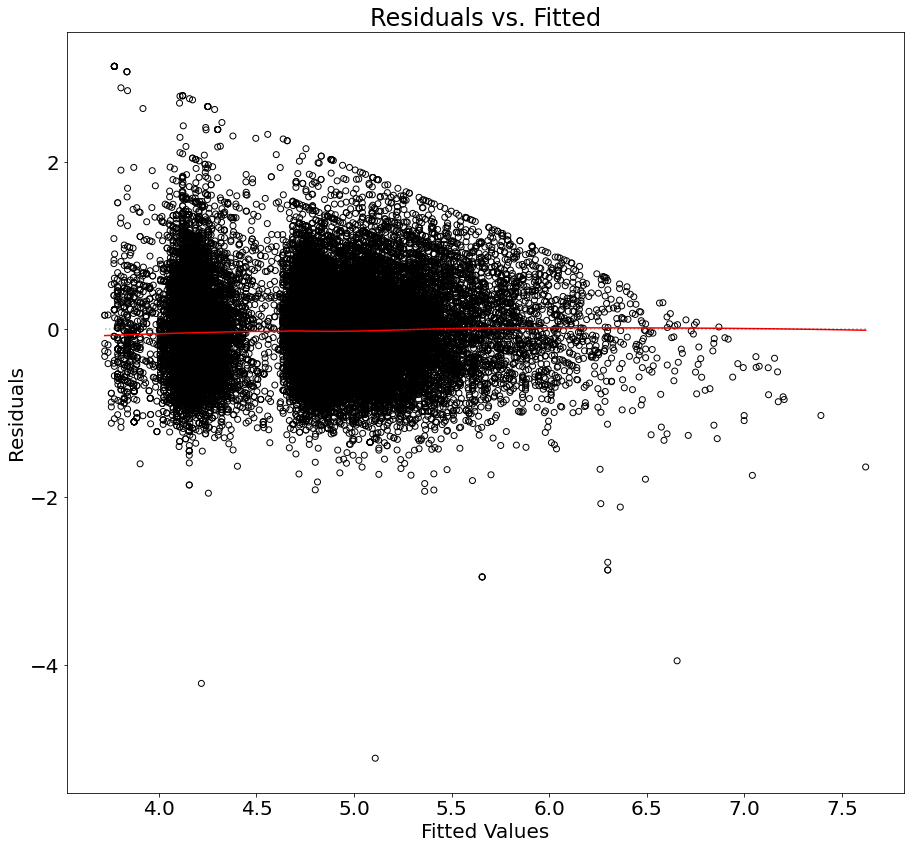

In [61]:
residuals1 = A_model1tr.resid
fitted1 = A_model1tr.fittedvalues
smoothed1 = lowess(residuals1,fitted1)

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (15,14)
fig, ax = plt.subplots() 
ax.scatter(fitted1, residuals1, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed1[:,0],smoothed1[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted1),max(fitted1)],[0,0],color = 'k',linestyle = ':', alpha = .3)


plt.show()

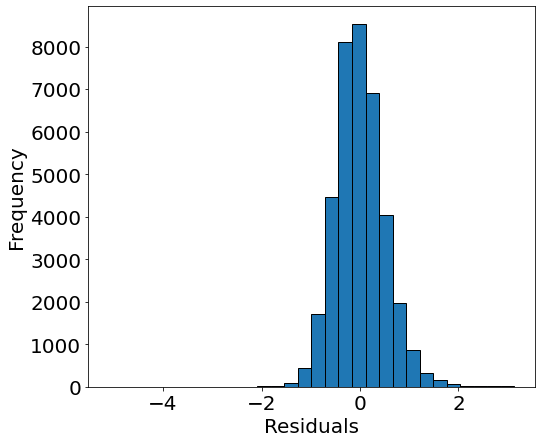

In [62]:
plt.figure(figsize=(8,7))
plt.rcParams.update({'font.size': 20})
plt.hist(residuals1, bins=30, histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

from statsmodels.formula.api import ols 
A_model2 = ols('price ~ C(airbnb["bedrooms"]):C(airbnb["year_of_experience"]):C(airbnb["accommodates"]):C(airbnb["host_identity_verified_t"]):C(airbnb["host_has_profile_pic_t"]):C(airbnb["host_is_superhost_t"]):C(airbnb["bathrooms"]):C(airbnb["room_type_Entire home/apt"]):C(airbnb["room_type_Hotel room"]):C(airbnb["room_type_Private room"]):C(airbnb["room_type_Shared room"]):C(airbnb["room_type_Hotel room"]):C(airbnb["room_type_Private room"]):C(airbnb["room_type_Shared room"])', data=airbnb).fit()
anova_table = sm.stats.anova_lm(A_model2, typ=3)
anova_table

# Mixed Variables Model (In & Out of Host-Controlled)

In [63]:
airbnb2 = airbnb.copy()
airbnb2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,9,New York,12,1,0,0,0,0,1,1
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,10,New York,11,0,0,1,0,0,1,1
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,10,New York,11,1,0,0,0,0,1,0
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,9,New York,11,0,0,1,0,0,1,0
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,10,New York,11,0,0,1,0,0,1,1


In [64]:
airbnb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47184 entries, 1 to 69755
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       47184 non-null  object 
 1   accommodates                 47184 non-null  int32  
 2   bathrooms                    47184 non-null  int32  
 3   bedrooms                     47184 non-null  int32  
 4   price                        47184 non-null  float64
 5   number_of_reviews            47184 non-null  int32  
 6   review_scores_rating         47184 non-null  int32  
 7   review_scores_accuracy       47184 non-null  int32  
 8   review_scores_cleanliness    47184 non-null  int32  
 9   review_scores_checkin        47184 non-null  int32  
 10  review_scores_communication  47184 non-null  int32  
 11  review_scores_location       47184 non-null  int32  
 12  city                         47184 non-null  object 
 13  year_of_experien

# Limited use of mixed variables model

In [65]:
#extracting 'city' from categorical to numerical values

city = pd.get_dummies(airbnb2["city"], prefix='city', drop_first=True)
city

,city_Austin,city_Chicago,city_New Orleans,city_New York
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
69746,0,0,0,0
69749,0,0,0,0
69751,0,0,0,0
69753,0,0,0,0


In [66]:
#concatenate extracted 'city ' features into initial data frame

airbnb2 = pd.concat([airbnb2,city], axis=1)
airbnb2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Austin,city_Chicago,city_New Orleans,city_New York
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,0,0,0,0,1,1,0,0,0,1
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,0,1,0,0,1,1,0,0,0,1
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,0,0,0,0,1,0,0,0,0,1
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,0,1,0,0,1,0,0,0,0,1
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,0,1,0,0,1,1,0,0,0,1


In [67]:
#extracting 'neighbourhood_cleansed' from categorical to numerical values

neighbourhood_cleansed = pd.get_dummies(airbnb2["neighbourhood_cleansed"], prefix='neighbourhood_cleansed', drop_first=True)
neighbourhood_cleansed

,neighbourhood_cleansed_28715,neighbourhood_cleansed_28732,neighbourhood_cleansed_28801,neighbourhood_cleansed_28803,neighbourhood_cleansed_28804,neighbourhood_cleansed_28805,neighbourhood_cleansed_28806,neighbourhood_cleansed_78701,neighbourhood_cleansed_78702,neighbourhood_cleansed_78703,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Whitney,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodside
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69746,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69749,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69751,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69753,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#concatenate extracted 'neighbourhood_cleansed ' features into initial data frame

airbnb2 = pd.concat([airbnb2,neighbourhood_cleansed], axis=1)
airbnb2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Whitney,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodside
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,0,0,0,0,0,0,0,0,0,0
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,0,0,0,0,0,0,0,0,0,0
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,0,0,0,0,0,0,0,0,0,0
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,0,0,0,0,0,0,0,0,0,0
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# create new data frame
airbnb3 = airbnb2.copy()
airbnb3.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Whitney,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodside
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,0,0,0,0,0,0,0,0,0,0
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,0,0,0,0,0,0,0,0,0,0
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,0,0,0,0,0,0,0,0,0,0
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,0,0,0,0,0,0,0,0,0,0
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#dropping categorical values features

airbnb3.drop(['neighbourhood_cleansed', 'city', 'year_of_experience', 'host_identity_verified_t', 'host_has_profile_pic_t', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating'],  axis=1, inplace=True)
airbnb3.head()  

,accommodates,bathrooms,bedrooms,price,number_of_reviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Whitney,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodside
1,3,1,1,4.330733,354,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,4.094345,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,5.164786,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4.290459,473,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,4.317488,118,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
airbnb2.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Whitney,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodside
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,0,0,0,0,0,0,0,0,0,0
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,0,0,0,0,0,0,0,0,0,0
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,0,0,0,0,0,0,0,0,0,0
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,0,0,0,0,0,0,0,0,0,0
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Separating dataset into Mix variables features and response

LX_Mix = airbnb3.drop('price',axis=1) #Independent features 
Ly_Mix = airbnb3['price'] #Dependent features

print(LX_Mix.shape)
print(Ly_Mix.shape)

(47184, 420)
(47184,)


In [73]:
from sklearn.model_selection import train_test_split

LX_Mix_train,LX_Mix_test,Ly_Mix_train,Ly_Mix_test = train_test_split(LX_Mix,Ly_Mix,test_size=0.2,random_state=5)

In [74]:
L_model3 = LinearRegression()
L_model3.fit(LX_Mix_train,Ly_Mix_train)

LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Mix Variables :")
print("Training Set  : {:.3f}".format(L_model3.score(LX_Mix_train,Ly_Mix_train)))
print("Testing Set  : {:.3f}".format(L_model3.score(LX_Mix_test,Ly_Mix_test)))

Ly_train_pred2 = L_model3.predict(LX_Mix_train)
Ly_test_pred2 = L_model3.predict(LX_Mix_test)
print("Train R2 score :", r2_score(Ly_Mix_train,Ly_train_pred2))
print("Test R2 score :", r2_score(Ly_Mix_test,Ly_test_pred2))
print("Train mse: ", mean_squared_error(Ly_Mix_train, Ly_train_pred2))
print("Test mse: ", mean_squared_error(Ly_Mix_test, Ly_test_pred2))
print("Train rmse: ", sqrt(mean_squared_error(Ly_Mix_train, Ly_train_pred2)))
print("Test rmse: ", sqrt(mean_squared_error(Ly_Mix_test, Ly_test_pred2)))



Mix Variables :
Training Set  : 0.614
Testing Set  : -1157721595861.094
Train R2 score : 0.6142796901631324
Test R2 score : -1157721595861.094
Train mse:  0.19178506008075416
Test mse:  571752877160.8181
Train rmse:  0.4379327118185557
Test rmse:  756143.4236709449


In [76]:
import statsmodels.api as sm

L_model4tr = sm.OLS(Ly_Mix_train,LX_Mix_train).fit()

In [77]:
print_Lmodel4tr = L_model4tr.summary()
print(print_Lmodel4tr)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     144.3
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:58:04   Log-Likelihood:                -22393.
No. Observations:               37747   AIC:                         4.561e+04
Df Residuals:                   37334   BIC:                         4.914e+04
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [78]:
import statsmodels.api as sm

L_model4te = sm.OLS(Ly_Mix_test,LX_Mix_test).fit()

In [79]:
print_Lmodel4te = L_model4te.summary()
print(print_Lmodel4te)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     41.05
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        06:58:06   Log-Likelihood:                -5468.5
No. Observations:                9437   AIC:                         1.167e+04
Df Residuals:                    9072   BIC:                         1.428e+04
Df Model:                         364                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

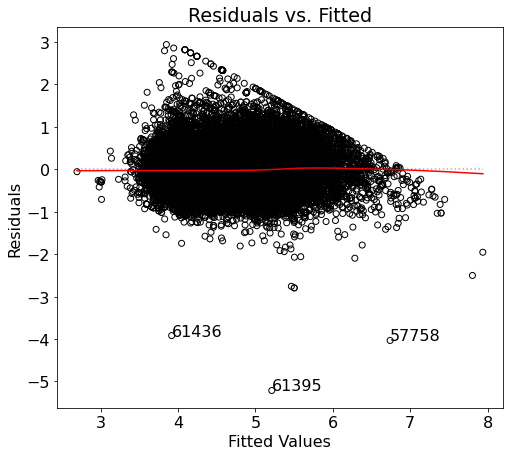

In [80]:
residuals5 = L_model4tr.resid
fitted5 = L_model4tr.fittedvalues
smoothed5 = lowess(residuals5,fitted5)
top3 = abs(residuals5).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted5, residuals5, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed5[:,0],smoothed5[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted5),max(fitted5)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted5[i],residuals5[i]))

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------

# Additional factors to mixed variables model

In [81]:
#dropping categorical values features

airbnb2.drop(['neighbourhood_cleansed','city'],  axis=1, inplace=True)
airbnb2.head() 

,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Whitney,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodside
1,3,1,1,4.330733,354,89,8,9,9,9,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,4.094345,50,90,8,8,10,10,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,5.164786,1,97,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4.290459,473,84,9,7,9,9,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,4.317488,118,98,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#Separating dataset into Mix variables features and response

AX_Mix = airbnb2.drop('price',axis=1) #Independent features 
Ay_Mix = airbnb2['price'] #Dependent features

print(AX_Mix.shape)
print(Ay_Mix.shape)

(47184, 429)
(47184,)


In [83]:
from sklearn.model_selection import train_test_split

AX_Mix_train,AX_Mix_test,Ay_Mix_train,Ay_Mix_test = train_test_split(AX_Mix,Ay_Mix,test_size=0.2,random_state=5)

In [84]:
A_model3 = LinearRegression()
A_model3.fit(AX_Mix_train,Ay_Mix_train)

LinearRegression()

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Mix Variables :")
print("Training Set  : {:.3f}".format(A_model3.score(AX_Mix_train,Ay_Mix_train)))
print("Testing Set  : {:.3f}".format(A_model3.score(AX_Mix_test,Ay_Mix_test)))

Ay_train_pred2 = A_model3.predict(AX_Mix_train)
Ay_test_pred2 = A_model3.predict(AX_Mix_test)
print("Train R2 score :", r2_score(Ay_Mix_train,Ay_train_pred2))
print("Test R2 score :", r2_score(Ay_Mix_test,Ay_test_pred2))
print("Train mse: ", mean_squared_error(Ay_Mix_train, Ay_train_pred2))
print("Test mse: ", mean_squared_error(Ay_Mix_test, Ay_test_pred2))
print("Train rmse: ", sqrt(mean_squared_error(Ay_Mix_train, Ay_train_pred2)))
print("Test rmse: ", sqrt(mean_squared_error(Ay_Mix_test, Ay_test_pred2)))



Mix Variables :
Training Set  : 0.620
Testing Set  : -2197442882360.580
Train R2 score : 0.6199744864431089
Test R2 score : -2197442882360.58
Train mse:  0.18895353470122506
Test mse:  1085230071614.2592
Train rmse:  0.4346878589300891
Test rmse:  1041743.7648549951


In [86]:
import statsmodels.api as sm

A_model4tr = sm.OLS(Ay_Mix_train,AX_Mix_train).fit()

In [87]:
print_Lmodel4tr = L_model4tr.summary()
print(print_Lmodel4tr)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     144.3
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:03:56   Log-Likelihood:                -22393.
No. Observations:               37747   AIC:                         4.561e+04
Df Residuals:                   37334   BIC:                         4.914e+04
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [88]:
import statsmodels.api as sm

A_model4te = sm.OLS(Ay_Mix_test,AX_Mix_test).fit()

In [89]:
print_Amodel4te = A_model4te.summary()
print(print_Amodel4te)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     41.13
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:03:59   Log-Likelihood:                -5396.2
No. Observations:                9437   AIC:                         1.154e+04
Df Residuals:                    9064   BIC:                         1.421e+04
Df Model:                         372                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

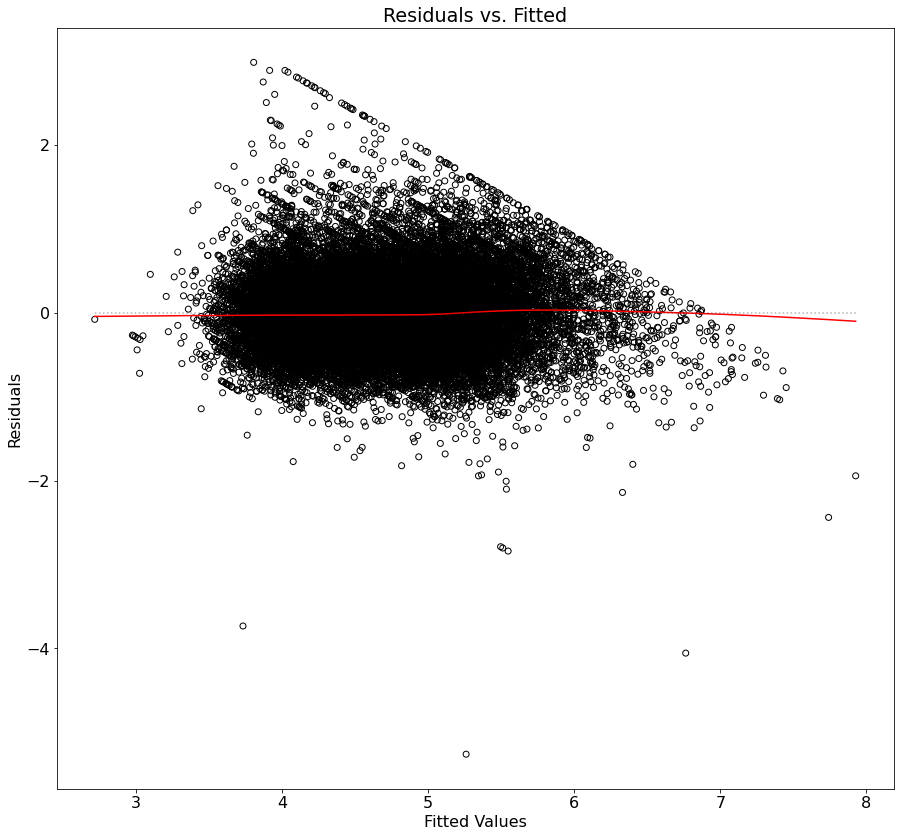

In [90]:
residuals4 = A_model4tr.resid
fitted4 = A_model4tr.fittedvalues
smoothed4 = lowess(residuals4,fitted4)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (15,14)
fig, ax = plt.subplots()
ax.scatter(fitted4, residuals4, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed4[:,0],smoothed4[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted4),max(fitted4)],[0,0],color = 'k',linestyle = ':', alpha = .3)


plt.show()

# Adjusted mixed variables model

In [91]:
airbnb4 = airbnb.copy()
airbnb4.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,review_scores_location,city,year_of_experience,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,9,New York,12,1,0,0,0,0,1,1
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,10,New York,11,0,0,1,0,0,1,1
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,10,New York,11,1,0,0,0,0,1,0
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,9,New York,11,0,0,1,0,0,1,0
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,10,New York,11,0,0,1,0,0,1,1


In [92]:
#extracting 'city' from categorical to numerical values

city = pd.get_dummies(airbnb4["city"], prefix='city', drop_first=True)
city

,city_Austin,city_Chicago,city_New Orleans,city_New York
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
69746,0,0,0,0
69749,0,0,0,0
69751,0,0,0,0
69753,0,0,0,0


In [93]:
#concatenate extracted 'city ' features into initial data frame

airbnb4 = pd.concat([airbnb4,city], axis=1)
airbnb4.head()

,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Austin,city_Chicago,city_New Orleans,city_New York
1,Clinton Hill,3,1,1,4.330733,354,89,8,9,9,...,0,0,0,0,1,1,0,0,0,1
2,Bedford-Stuyvesant,2,1,1,4.094345,50,90,8,8,10,...,0,1,0,0,1,1,0,0,0,1
3,Sunset Park,4,1,2,5.164786,1,97,10,10,10,...,0,0,0,0,1,0,0,0,0,1
4,Hell's Kitchen,2,1,1,4.290459,473,84,9,7,9,...,0,1,0,0,1,0,0,0,0,1
5,Upper West Side,1,1,1,4.317488,118,98,10,10,10,...,0,1,0,0,1,1,0,0,0,1


In [94]:
#dropping categorical values features

airbnb4.drop(['neighbourhood_cleansed','city'],  axis=1, inplace=True)
airbnb4.head() 

,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,city_Austin,city_Chicago,city_New Orleans,city_New York
1,3,1,1,4.330733,354,89,8,9,9,9,...,0,0,0,0,1,1,0,0,0,1
2,2,1,1,4.094345,50,90,8,8,10,10,...,0,1,0,0,1,1,0,0,0,1
3,4,1,2,5.164786,1,97,10,10,10,10,...,0,0,0,0,1,0,0,0,0,1
4,2,1,1,4.290459,473,84,9,7,9,9,...,0,1,0,0,1,0,0,0,0,1
5,1,1,1,4.317488,118,98,10,10,10,10,...,0,1,0,0,1,1,0,0,0,1


In [95]:
#Separating dataset into Mix variables features and response

AX_Mix = airbnb4.drop('price',axis=1) #Independent features 
Ay_Mix = airbnb4['price'] #Dependent features

print(AX_Mix.shape)
print(Ay_Mix.shape)

(47184, 22)
(47184,)


In [96]:
from sklearn.model_selection import train_test_split

AX_Mix_train,AX_Mix_test,Ay_Mix_train,Ay_Mix_test = train_test_split(AX_Mix,Ay_Mix,test_size=0.2,random_state=5)

In [97]:
A_model5 = LinearRegression()
A_model5.fit(AX_Mix_train,Ay_Mix_train)

LinearRegression()

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Mix Variables :")
print("Training Set  : {:.3f}".format(A_model5.score(AX_Mix_train,Ay_Mix_train)))
print("Testing Set  : {:.3f}".format(A_model5.score(AX_Mix_test,Ay_Mix_test)))

Ay_train_pred3 = A_model5.predict(AX_Mix_train)
Ay_test_pred3 = A_model5.predict(AX_Mix_test)
print("Train R2 score :", r2_score(Ay_Mix_train,Ay_train_pred3))
print("Test R2 score :", r2_score(Ay_Mix_test,Ay_test_pred3))
print("Train mse: ", mean_squared_error(Ay_Mix_train, Ay_train_pred3))
print("Test mse: ", mean_squared_error(Ay_Mix_test, Ay_test_pred3))
print("Train rmse: ", sqrt(mean_squared_error(Ay_Mix_train, Ay_train_pred3)))
print("Test rmse: ", sqrt(mean_squared_error(Ay_Mix_test, Ay_test_pred3)))


Mix Variables :
Training Set  : 0.519
Testing Set  : 0.518
Train R2 score : 0.5191176193742509
Test R2 score : 0.517949086768832
Train mse:  0.23910085600390213
Test mse:  0.23806586796256926
Train rmse:  0.48897940243317217
Test rmse:  0.4879199401157625


In [99]:
import statsmodels.api as sm

A_model6tr = sm.OLS(Ay_Mix_train,AX_Mix_train).fit()

In [100]:
print_Amodel6tr = A_model6tr.summary()
print(print_Amodel6tr)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2036.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:11:18   Log-Likelihood:                -26555.
No. Observations:               37747   AIC:                         5.315e+04
Df Residuals:                   37726   BIC:                         5.333e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
accommodates      

In [101]:
import statsmodels.api as sm

A_model6te = sm.OLS(Ay_Mix_test,AX_Mix_test).fit()

In [102]:
print_Amodel6te = A_model6te.summary()
print(print_Amodel6te)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     509.7
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:11:19   Log-Likelihood:                -6599.7
No. Observations:                9437   AIC:                         1.324e+04
Df Residuals:                    9416   BIC:                         1.339e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
accommodates      

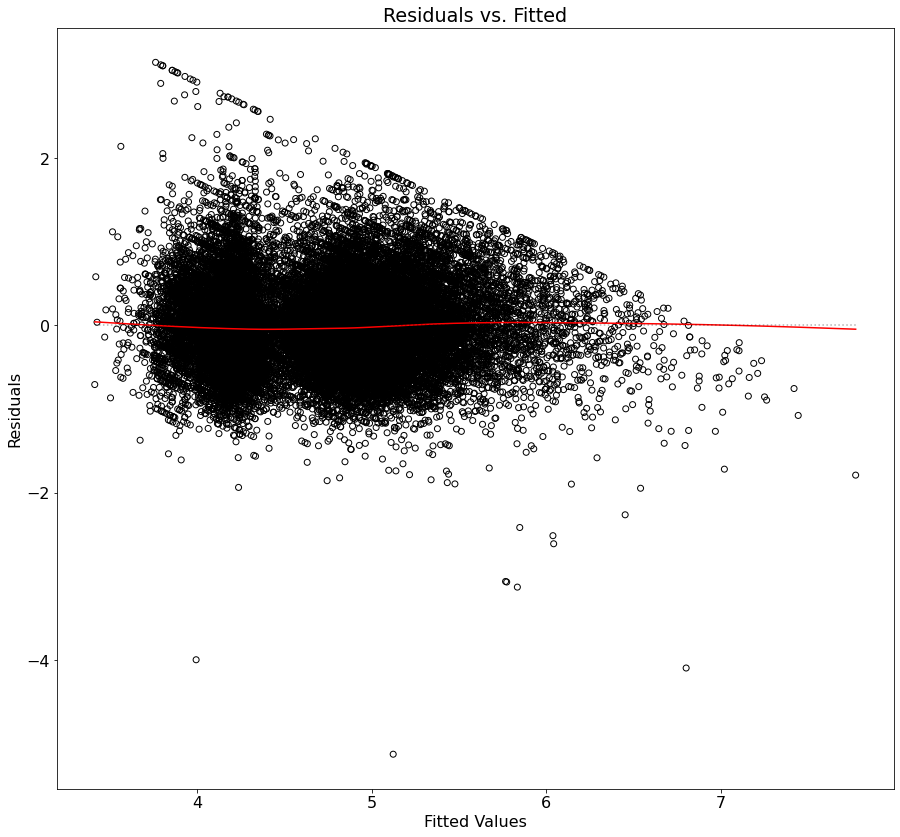

In [103]:
residuals6 = A_model6tr.resid
fitted6 = A_model6tr.fittedvalues
smoothed6 = lowess(residuals6,fitted6)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (15,14)
fig, ax = plt.subplots()
ax.scatter(fitted6, residuals6, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed6[:,0],smoothed6[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted6),max(fitted6)],[0,0],color = 'k',linestyle = ':', alpha = .3)

plt.show()

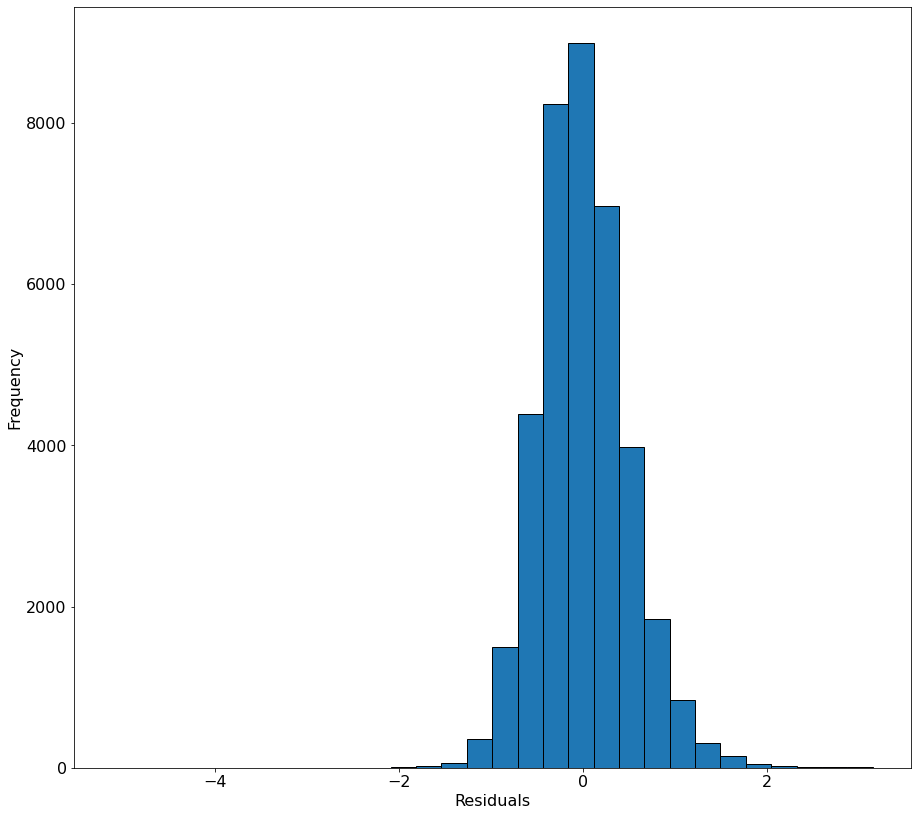

In [104]:
plt.hist(residuals6, bins=30, histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show() 